## Cen√°rio

No momento da adesao de um seguro, tenho cerca de 20 vari√°veis (categoricas e numericas) para mapear o perfil dos clientes na entrada, em jan/24, houveram 25000 adesoes, em fev 30000, mar 27000, abr 20000, mai 25555.

Como identifcar qual vari√°vel teve a maior varia√ß√£o e o que mudou entre os meses?

In [11]:
# Importa bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Simular base de dados
np.random.seed(42)
meses = ['jan/24', 'fev/24', 'mar/24', 'abr/24', 'mai/24']
n_adesoes = [25000, 30000, 27000, 20000, 25555]

In [13]:
# Criar dataframe simulado
dados = []
for mes, n in zip(meses, n_adesoes):
    for _ in range(n):
        linha = {
            'Mes': mes,
            'Var_Categ1': np.random.choice(['A', 'B', 'C']),
            'Var_Categ2': np.random.choice(['X', 'Y']),
            'Var_Num1': np.random.normal(50, 10),
            'Var_Num2': np.random.normal(100, 20)
        }
        dados.append(linha)
df = pd.DataFrame(dados)
df.head()

Mes Var_Categ1 Var_Categ2   Var_Num1    Var_Num2
0  jan/24          C          Y  38.881199  106.378044
1  jan/24          C          X  65.792128  115.348695
2  jan/24          B          X  44.191219   89.496604
3  jan/24          A          X  52.419623   61.734395
4  jan/24          A          X  25.608942  112.068825

In [14]:
# -------------------------------
# Analisar vari√°veis categ√≥ricas
# -------------------------------
variaveis_categ = ['Var_Categ1', 'Var_Categ2']
variacao_categ = {}

for var in variaveis_categ:
    distrib = df.groupby(['Mes', var]).size().groupby(level=0).apply(lambda x: x / x.sum())
    pivot = distrib.unstack(var)
    delta = pivot.diff().abs().sum().sum()
    variacao_categ[var] = delta


In [15]:
# -------------------------------
# Analisar vari√°veis num√©ricas
# -------------------------------
variaveis_num = ['Var_Num1', 'Var_Num2']
variacao_num = {}

for var in variaveis_num:
    medias = df.groupby('Mes')[var].mean()
    delta = medias.diff().abs().sum()
    variacao_num[var] = delta

In [16]:
# -------------------------------
# Juntar resultados e achar o maior
# -------------------------------
resultados = pd.DataFrame({
    'Variavel': list(variacao_categ.keys()) + list(variacao_num.keys()),
    'Variacao': list(variacao_categ.values()) + list(variacao_num.values())
})

maior_variacao = resultados.sort_values('Variacao', ascending=False).iloc[0]
maior_variacao

Variavel    Var_Num2
Variacao    0.379924
Name: 3, dtype: object

In [17]:
print("Resumo das varia√ß√µes entre meses:")
print(resultados)
print(f"\nVari√°vel com maior varia√ß√£o: {maior_variacao['Variavel']} (Varia√ß√£o total: {maior_variacao['Variacao']:.4f})")

Resumo das varia√ß√µes entre meses:
     Variavel  Variacao
0  Var_Categ1  0.032193
1  Var_Categ2  0.019830
2    Var_Num1  0.256618
3    Var_Num2  0.379924

Vari√°vel com maior varia√ß√£o: Var_Num2 (Varia√ß√£o total: 0.3799)


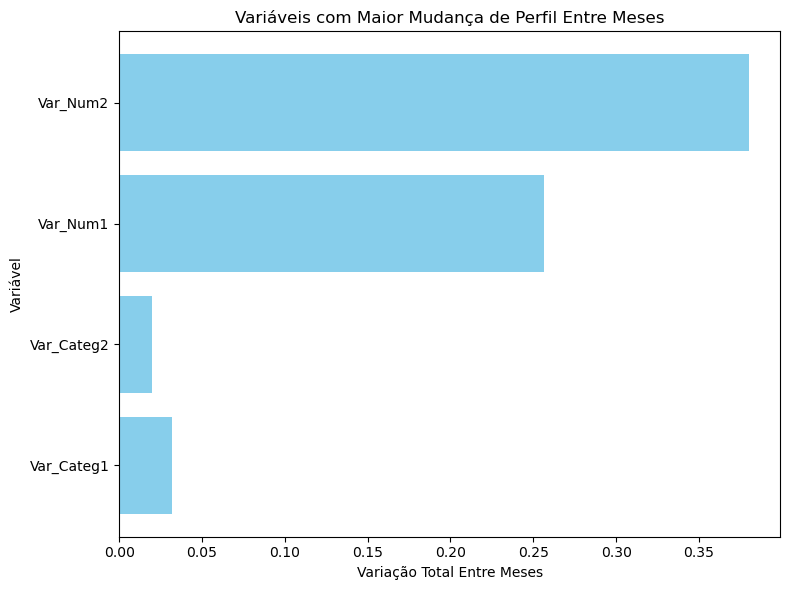

In [18]:
# Gr√°fico
plt.figure(figsize=(8, 6))
plt.barh(resultados['Variavel'], resultados['Variacao'], color='skyblue')
plt.xlabel('Varia√ß√£o Total Entre Meses')
plt.ylabel('Vari√°vel')
plt.title('Vari√°veis com Maior Mudan√ßa de Perfil Entre Meses')
plt.tight_layout()
plt.show()

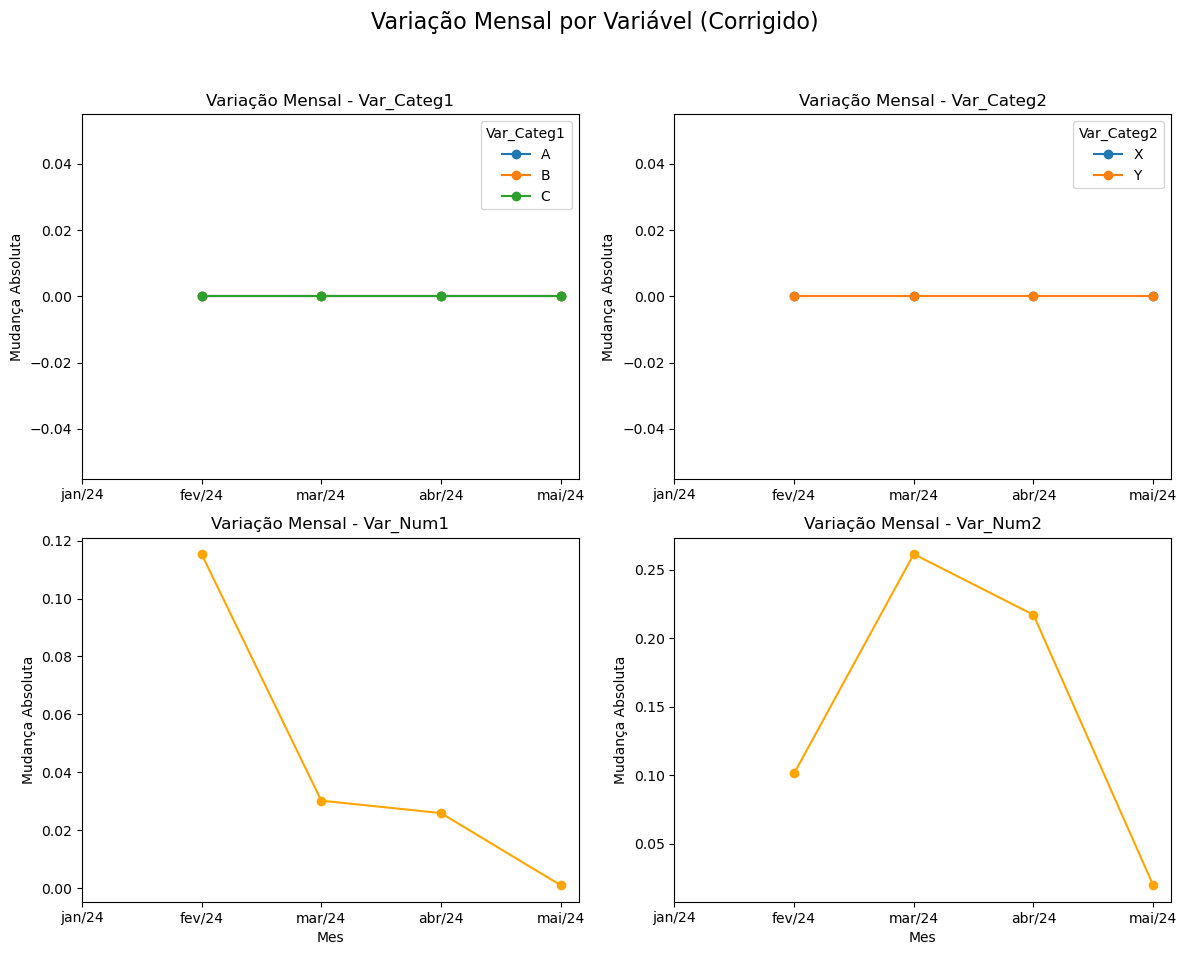

In [23]:
# Garantir que s√≥ usamos categorias presentes e ordenadas
ordem_meses = ['jan/24', 'fev/24', 'mar/24', 'abr/24', 'mai/24']

# Preparar subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Varia√ß√£o Mensal por Vari√°vel (Corrigido)', fontsize=16)

# Vari√°veis categ√≥ricas
for i, var in enumerate(variaveis_categ):
    distrib = df.groupby(['Mes', var]).size().groupby(level=0).apply(lambda x: x / x.sum())
    pivot = distrib.unstack(var)
    # Preencher valores ausentes com 0 para evitar vazios
    pivot = pivot.reindex(ordem_meses).fillna(0)
    pivot.diff().abs().plot(ax=axs[0, i], marker='o')
    axs[0, i].set_title(f'Varia√ß√£o Mensal - {var}')
    axs[0, i].set_ylabel('Mudan√ßa Absoluta')
    axs[0, i].set_xticks(range(len(ordem_meses)))
    axs[0, i].set_xticklabels(ordem_meses)

# Vari√°veis num√©ricas
for i, var in enumerate(variaveis_num):
    medias = df.groupby('Mes')[var].mean().reindex(ordem_meses)
    medias.diff().abs().plot(ax=axs[1, i], marker='o', color='orange')
    axs[1, i].set_title(f'Varia√ß√£o Mensal - {var}')
    axs[1, i].set_ylabel('Mudan√ßa Absoluta')
    axs[1, i].set_xticks(range(len(ordem_meses)))
    axs[1, i].set_xticklabels(ordem_meses)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


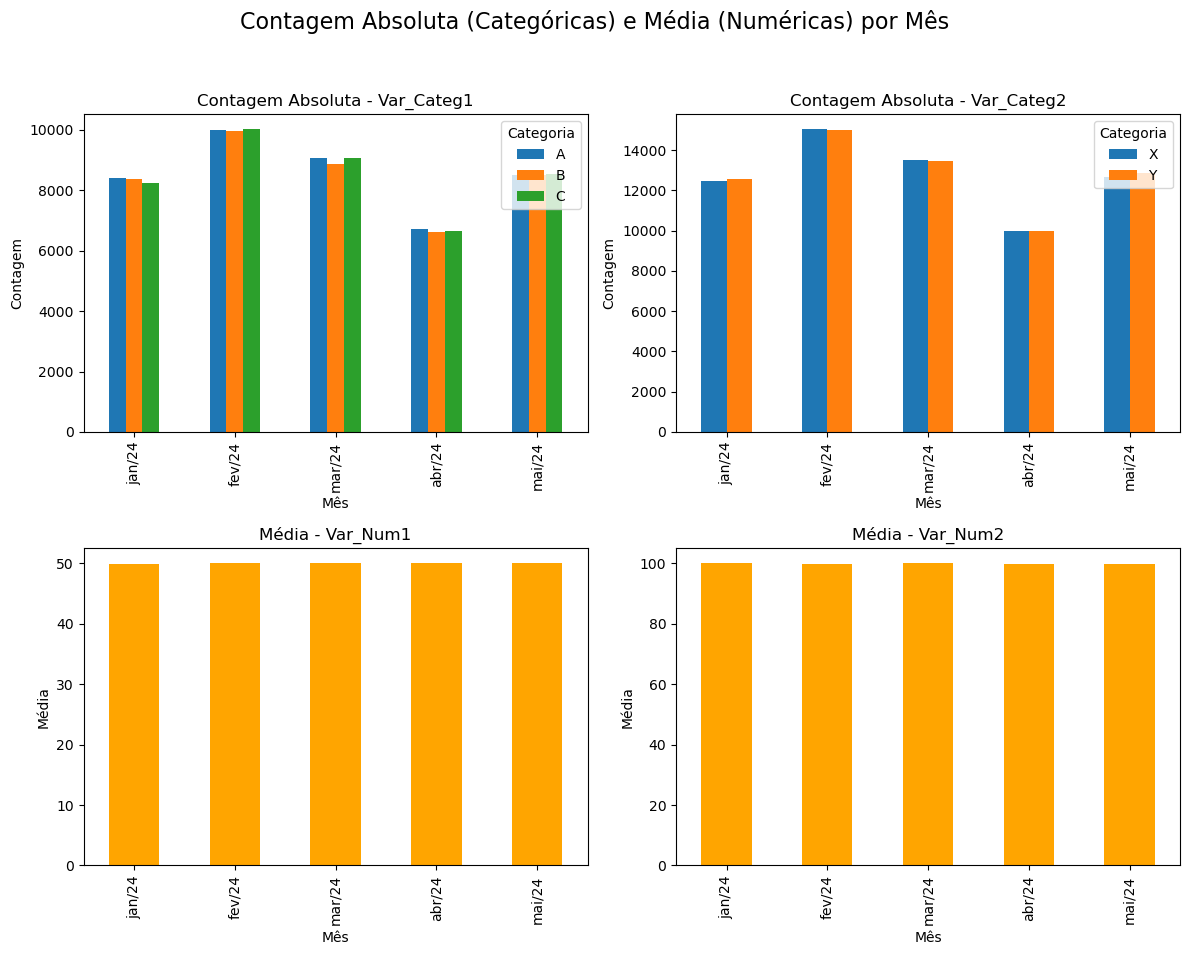

In [24]:
# Preparar subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Contagem Absoluta (Categ√≥ricas) e M√©dia (Num√©ricas) por M√™s', fontsize=16)

# Vari√°veis categ√≥ricas (contagem absoluta)
for i, var in enumerate(variaveis_categ):
    contagem = df.groupby(['Mes', var]).size().unstack(var).reindex(ordem_meses).fillna(0)
    contagem.plot(kind='bar', ax=axs[0, i])
    axs[0, i].set_title(f'Contagem Absoluta - {var}')
    axs[0, i].set_ylabel('Contagem')
    axs[0, i].set_xlabel('M√™s')
    axs[0, i].legend(title='Categoria')

# Vari√°veis num√©ricas (m√©dia)
for i, var in enumerate(variaveis_num):
    media = df.groupby('Mes')[var].mean().reindex(ordem_meses)
    media.plot(kind='bar', ax=axs[1, i], color='orange')
    axs[1, i].set_title(f'M√©dia - {var}')
    axs[1, i].set_ylabel('M√©dia')
    axs[1, i].set_xlabel('M√™s')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [25]:
# Preparar resumo autom√°tico

resumo = []

# Analisar vari√°veis categ√≥ricas
for var in variaveis_categ:
    contagem = df.groupby(['Mes', var]).size().unstack(var).reindex(ordem_meses).fillna(0)
    variacoes = contagem.diff().sum()
    grupo_maior_queda = variacoes.idxmin()
    valor_queda = variacoes.min()
    resumo.append(f"Na vari√°vel categ√≥rica '{var}', o grupo '{grupo_maior_queda}' teve a maior queda acumulada: {valor_queda:.0f} ades√µes a menos ao longo dos meses.")

# Analisar vari√°veis num√©ricas
for var in variaveis_num:
    media_mensal = df.groupby('Mes')[var].mean().reindex(ordem_meses)
    variacao_total = media_mensal.diff().sum()
    direcao = "aumento" if variacao_total > 0 else "queda"
    resumo.append(f"Na vari√°vel num√©rica '{var}', houve uma {direcao} acumulada de {abs(variacao_total):.2f} na m√©dia ao longo dos meses.")

# Mostrar o resumo final
print("\nüìä Resumo automatizado para √°rea de neg√≥cios:\n")
for linha in resumo:
    print("- " + linha)



üìä Resumo automatizado para √°rea de neg√≥cios:

- Na vari√°vel categ√≥rica 'Var_Categ1', o grupo 'A' teve a maior queda acumulada: 114 ades√µes a menos ao longo dos meses.
- Na vari√°vel categ√≥rica 'Var_Categ2', o grupo 'X' teve a maior queda acumulada: 244 ades√µes a menos ao longo dos meses.
- Na vari√°vel num√©rica 'Var_Num1', houve uma aumento acumulada de 0.06 na m√©dia ao longo dos meses.
- Na vari√°vel num√©rica 'Var_Num2', houve uma queda acumulada de 0.04 na m√©dia ao longo dos meses.


## üî∂ 1Ô∏è‚É£ An√°lise de tend√™ncia (trend analysis)
Use modelos simples como regress√£o linear para ver se h√° tend√™ncia crescente ou decrescente nas categorias e m√©dias.

Ex.: ‚ÄúGrupo A est√° caindo 10% ao m√™s, se continuar, desaparecer√° em X meses.‚Äù

In [26]:
from sklearn.linear_model import LinearRegression
import numpy as np

for var in variaveis_categ:
    contagem = df.groupby(['Mes', var]).size().unstack(var).reindex(ordem_meses).fillna(0)
    print(f"\nüìà Tend√™ncia para {var}:")
    for cat in contagem.columns:
        y = contagem[cat].values
        X = np.arange(len(y)).reshape(-1, 1)
        model = LinearRegression().fit(X, y)
        slope = model.coef_[0]
        direction = "subindo" if slope > 0 else "descendo"
        print(f"- Categoria '{cat}' est√° {direction} a uma taxa m√©dia de {abs(slope):.2f} por m√™s")



üìà Tend√™ncia para Var_Categ1:
- Categoria 'A' est√° descendo a uma taxa m√©dia de 305.40 por m√™s
- Categoria 'B' est√° descendo a uma taxa m√©dia de 306.50 por m√™s
- Categoria 'C' est√° descendo a uma taxa m√©dia de 277.10 por m√™s

üìà Tend√™ncia para Var_Categ2:
- Categoria 'X' est√° descendo a uma taxa m√©dia de 453.90 por m√™s
- Categoria 'Y' est√° descendo a uma taxa m√©dia de 435.10 por m√™s


## üî∂ 2Ô∏è‚É£ An√°lise de volatilidade (oscila√ß√£o)
Me√ßa o desvio padr√£o ou variabilidade m√™s a m√™s para saber quais grupos s√£o mais inst√°veis.

Ex.: ‚ÄúO grupo B n√£o caiu tanto, mas oscila muito ‚Äî risco de perda imprevis√≠vel.‚Äù

In [27]:
for var in variaveis_categ:
    contagem = df.groupby(['Mes', var]).size().unstack(var).reindex(ordem_meses).fillna(0)
    print(f"\nüìä Volatilidade em {var}:")
    for cat in contagem.columns:
        std_dev = contagem[cat].std()
        print(f"- Categoria '{cat}' tem desvio padr√£o {std_dev:.2f} nas contagens")



üìä Volatilidade em Var_Categ1:
- Categoria 'A' tem desvio padr√£o 1198.51 nas contagens
- Categoria 'B' tem desvio padr√£o 1214.39 nas contagens
- Categoria 'C' tem desvio padr√£o 1230.49 nas contagens

üìä Volatilidade em Var_Categ2:
- Categoria 'X' tem desvio padr√£o 1833.66 nas contagens
- Categoria 'Y' tem desvio padr√£o 1807.90 nas contagens


## üî∂ 3Ô∏è‚É£ An√°lise de perfil dominante por m√™s
‚Üí Identificar qual grupo/categoria domina em cada m√™s e como isso muda.
Isso ajuda a responder perguntas como:

Qual plano, canal ou grupo √© mais comum em cada m√™s?

Algum perfil tomou espa√ßo de outro ao longo do tempo?

In [35]:
for var in variaveis_categ:
    dominante = df.groupby('Mes')[var].agg(lambda x: x.value_counts().idxmax())
    print(f"\nüèÜ Perfil dominante por m√™s para {var}:")
    print(dominante)



üèÜ Perfil dominante por m√™s para Var_Categ1:
Mes
abr/24    A
fev/24    C
jan/24    A
mai/24    C
mar/24    A
Name: Var_Categ1, dtype: object

üèÜ Perfil dominante por m√™s para Var_Categ2:
Mes
abr/24    Y
fev/24    X
jan/24    Y
mai/24    Y
mar/24    X
Name: Var_Categ2, dtype: object


## üî∂ 4Ô∏è‚É£ An√°lise de correla√ß√£o entre vari√°veis
‚Üí Medir como as vari√°veis num√©ricas e categ√≥ricas est√£o relacionadas entre si m√™s a m√™s.
Por exemplo:

Existe rela√ß√£o entre idade m√©dia e escolha de plano?

Produtos premium aparecem mais em algum canal espec√≠fico?

In [37]:
# Exemplo simples de correla√ß√£o num√©rica
corr = df[['Var_Num1', 'Var_Num2']].corr()
print("\nüîó Correla√ß√£o entre vari√°veis num√©ricas:")
print(corr)

# Exemplo cruzado categ√≥rico
#for var in variaveis_categ:
#    cruzado = pd.crosstab(df[var], df['Produto'], normalize='index')
#    print(f"\nüîç Rela√ß√£o entre {var} e Produto:")
#    print(cruzado)



üîó Correla√ß√£o entre vari√°veis num√©ricas:
          Var_Num1  Var_Num2
Var_Num1  1.000000  0.000347
Var_Num2  0.000347  1.000000


## üî∂ 5Ô∏è‚É£ An√°lise de impacto financeiro
Associe um valor financeiro m√©dio por grupo (engajamento, ticket, receita) para simular quanto de dinheiro est√° sendo perdido ou mantido.

Ex.: ‚ÄúOs clientes que sa√≠ram entre mar√ßo e abril representavam R$‚ÄØ500 mil em receita anual.‚Äù

In [30]:
valores_est = {'A': 100, 'B': 200, 'C': 300, 'X': 150, 'Y': 250}  # exemplo
for var in variaveis_categ:
    contagem = df.groupby(['Mes', var]).size().unstack(var).reindex(ordem_meses).fillna(0)
    impacto = sum(contagem[col] * valores_est.get(col, 100) for col in contagem.columns)
    print(f"\nüí∞ Impacto financeiro estimado por m√™s para {var}:")
    print(impacto)



üí∞ Impacto financeiro estimado por m√™s para Var_Categ1:
Mes
jan/24    4983900
fev/24    6000400
mar/24    5398900
abr/24    3993300
mai/24    5112600
dtype: int64

üí∞ Impacto financeiro estimado por m√™s para Var_Categ2:
Mes
jan/24    5005900
fev/24    5997600
mar/24    5397500
abr/24    4000300
mai/24    5120250
dtype: int64


## üî∂ 6Ô∏è‚É£ An√°lise de contribui√ß√£o (Pareto)
Veja quais grupos ou vari√°veis concentram a maior parte das perdas (ex.: 20% dos grupos respondem por 80% da queda).

Isso ajuda a priorizar a√ß√µes.



In [31]:
for var in variaveis_categ:
    total_por_cat = df[var].value_counts()
    total = total_por_cat.sum()
    contrib_pct = (total_por_cat / total * 100).sort_values(ascending=False)
    acumulado = contrib_pct.cumsum()
    print(f"\nüìä An√°lise de Pareto para {var}:")
    print(pd.DataFrame({'% Contribui√ß√£o': contrib_pct, '% Acumulado': acumulado}))



üìä An√°lise de Pareto para Var_Categ1:
            % Contribui√ß√£o  % Acumulado
Var_Categ1                             
A                33.485947    33.485947
C                33.314257    66.800204
B                33.199796   100.000000

üìä An√°lise de Pareto para Var_Categ2:
            % Contribui√ß√£o  % Acumulado
Var_Categ2                             
Y                50.082709    50.082709
X                49.917291   100.000000
